In [1]:
import sys
sys.path.append('..')

from src.data_generator import FinanceDataGenerator
from src.config import Config
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Config.ensure_directories()

In [2]:
generator = FinanceDataGenerator()
ar_df = generator.generate_accounts_receivable(n=100)
payments_df = generator.generate_payments(ar_df)
budget_df = generator.generate_budget_forecast()
claims_df = generator.generate_expense_claims()

     ARID         Customer InvoiceDate     DueDate   Amount Currency Status  \
0  AR0001  NextGen Systems  2024-10-14  2024-11-13  4845.32      USD   Paid   
1  AR0002     Innovate Ltd  2024-08-28  2024-09-27  4691.98      USD   Paid   
2  AR0003  NextGen Systems  2024-08-08  2024-09-07  1812.85      USD   Paid   
3  AR0004     Innovate Ltd  2024-03-03  2024-04-02  1022.73      USD   Paid   
4  AR0005     Innovate Ltd  2024-10-28  2024-11-27  4035.90      USD   Paid   

  ReceivedDate   Terms  
0   2024-11-17  Net 30  
1   2024-10-04  Net 30  
2   2024-09-05  Net 30  
3   2024-04-04  Net 30  
4   2024-11-28  Net 30  
Status
Paid       42
Pending    30
Overdue    20
Partial     8
Name: count, dtype: int64


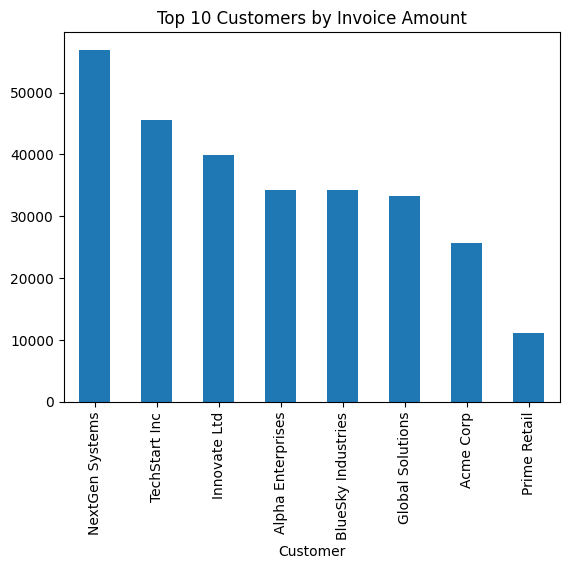

In [3]:
print(ar_df.head())
print(ar_df['Status'].value_counts())
ar_df.groupby('Customer')['Amount'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Customers by Invoice Amount')
plt.show()

             BudgetUSD   ActualUSD  VarianceUSD
Dept                                           
Finance     1193855.59  1271199.23     77343.62
HR           821825.60   906746.21     84920.61
IT           892007.37   977465.43     85458.05
Marketing   1149226.98  1120882.74    -28344.24
Operations   800314.39   822103.45     21789.06
Sales        969690.38  1014238.26     44547.91


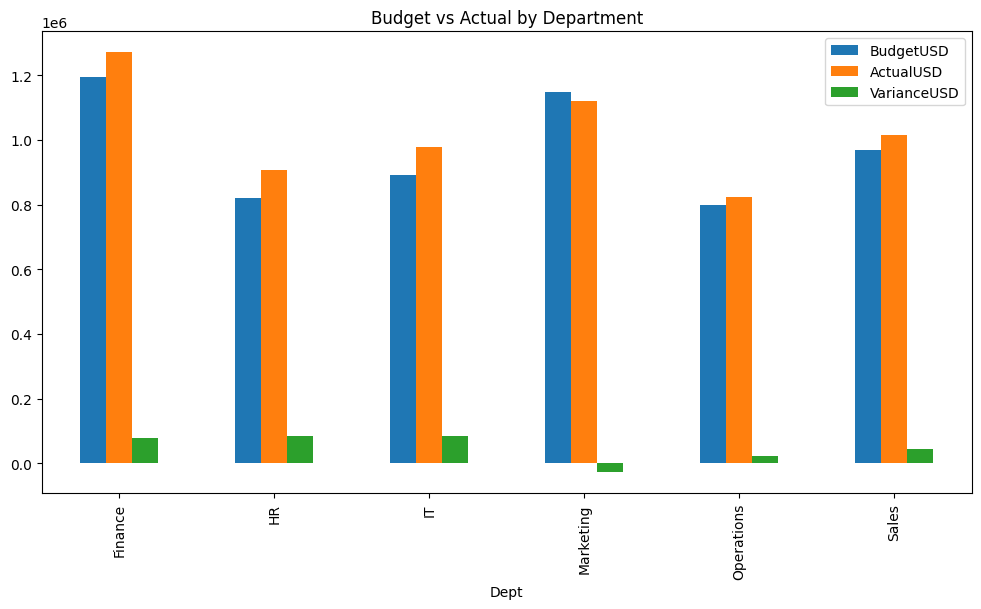

In [4]:
budget_summary = budget_df.groupby('Dept')[['BudgetUSD', 'ActualUSD', 'VarianceUSD']].sum()
print(budget_summary)
budget_summary.plot(kind='bar', figsize=(12, 6))
plt.title('Budget vs Actual by Department')
plt.show()

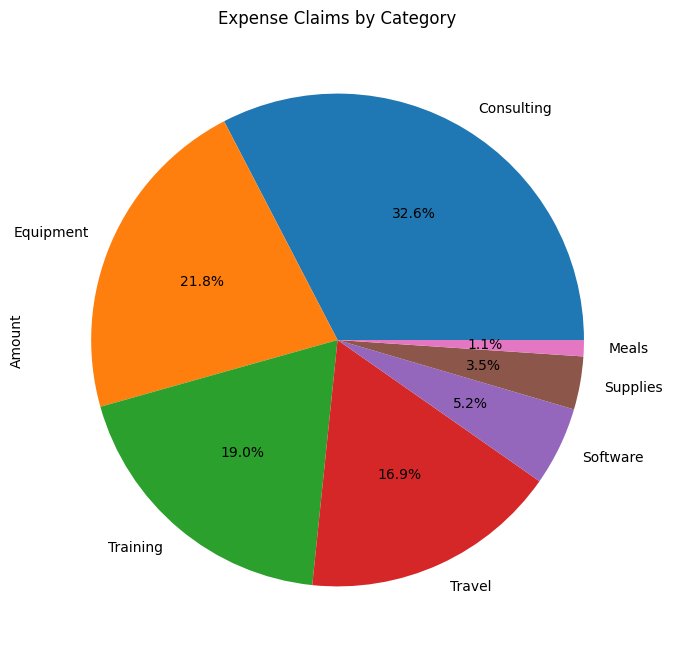

In [5]:
claims_by_category = claims_df.groupby('Category')['Amount'].sum().sort_values(ascending=False)
claims_by_category.plot(kind='pie', autopct='%1.1f%%', figsize=(10, 8))
plt.title('Expense Claims by Category')
plt.show()